# Data aquization

In [12]:
import requests
from bs4 import BeautifulSoup as bs

Using smartphone i use as a product oneplus_9rt

In [255]:
one_plus9rt = []
for i in range (1,21): #there is a for loop that iterates from 1 to 20 (inclusive). 
    #This is because the reviews are paginated on Amazon, with 20 reviews per page.
    ip=[]
    url ="https://www.amazon.in/product-reviews/B09N3YP13B/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=all_stars&reviewerType=all_reviews&sortBy=recent&pageNumber=1#reviews-filter-bar"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
        one_plus9rt = one_plus9rt+ip

In [256]:
one_plus9rt

["\nPros:- fast charging.Cons:- low battery life, heavy heating , using mobile it's was strucking, display not working properly, this is not worth money\n",
 "\nPros:- fast charging.Cons:- low battery life, heavy heating , using mobile it's was strucking, display not working properly, this is not worth money\n",
 "\nThe Biggest Disadvantage is you can't exchange while purchasing a new one. Amazon itself not listed in his exchange list. What can you say.\n",
 "\nPros:- fast charging.Cons:- low battery life, heavy heating , using mobile it's was strucking, display not working properly, this is not worth money\n",
 "\nThe Biggest Disadvantage is you can't exchange while purchasing a new one. Amazon itself not listed in his exchange list. What can you say.\n",
 '\nAfter using this phone from last 8 month. Phone quality is not good. Back cover easily breaked.  Battery life is not good. Need to charge two times in 12 hours.\n',
 "\nPros:- fast charging.Cons:- low battery life, heavy heating 

In [27]:
type(one_plus9rt)

list

In [50]:
import pandas as pd

# creating a DataFrame from the list of data
df = pd.DataFrame(one_plus9rt,columns=["review"])

# DataFrame to a CSV file
df.to_csv("oneplus.csv", index=False)

# data cleaning

In [65]:
import numpy as np
import re

In [222]:
oneplus = " ".join(one_plus9rt)

In [223]:
oneplus = re.sub("[^A-Za-z" "]+"," ",oneplus).lower()
oneplus =re.sub("[0-9" "]+"," ",oneplus)

In [224]:
oneplus[100:500]

'working properly this is not worth money pros fast charging cons low battery life heavy heating using mobile it s was strucking display not working properly this is not worth money the biggest disadvantage is you can t exchange while purchasing a new one amazon itself not listed in his exchange list what can you say pros fast charging cons low battery life heavy heating using mobile it s was struc'

# data preprocessing

In [225]:
import nltk
from nltk.corpus import stopwords

nlkt important resource

In [226]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [227]:
oneplus = oneplus.split(" ")#tokenization

In [228]:
oneplus_clean = [w for w in oneplus if not w in stop_words]

In [229]:
oneplus_clean = " ".join(oneplus)

In [230]:
oneplus_clean

' pros fast charging cons low battery life heavy heating using mobile it s was strucking display not working properly this is not worth money pros fast charging cons low battery life heavy heating using mobile it s was strucking display not working properly this is not worth money the biggest disadvantage is you can t exchange while purchasing a new one amazon itself not listed in his exchange list what can you say pros fast charging cons low battery life heavy heating using mobile it s was strucking display not working properly this is not worth money the biggest disadvantage is you can t exchange while purchasing a new one amazon itself not listed in his exchange list what can you say after using this phone from last month phone quality is not good back cover easily breaked battery life is not good need to charge two times in hours pros fast charging cons low battery life heavy heating using mobile it s was strucking display not working properly this is not worth money the biggest di

# Emotion mining

In [231]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [232]:
wordcloud_op = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1200
                     ).generate(oneplus_clean)

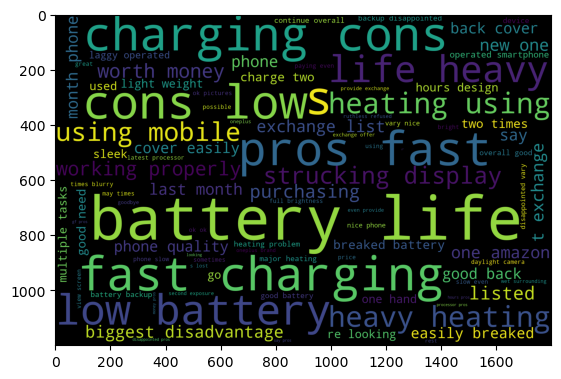

In [233]:
plt.imshow(wordcloud_op)

In [215]:
with open("positive-words.txt","r") as file:
 positive= file.read().split("\n")
 positive = positive[37:]

In [236]:
positive_words_list= []

In [237]:
for word in oneplus:
    if word in positive:
        positive_words_list.append(word)

In [238]:
print(positive_words_list)

['', 'pros', 'fast', 'properly', 'worth', 'pros', 'fast', 'properly', 'worth', 'pros', 'fast', 'properly', 'worth', 'good', 'good', 'pros', 'fast', 'properly', 'worth', 'good', 'good', 'sleek', 'fast', 'pros', 'fast', 'properly', 'worth', 'good', 'good', 'sleek', 'fast', 'pros', 'fast', 'properly', 'worth', 'good', 'good', 'sleek', 'fast', 'good', 'pros', 'fast', 'properly', 'worth', 'good', 'good', 'sleek', 'fast', 'good', 'nice', 'pros', 'fast', 'properly', 'worth', 'good', 'good', 'sleek', 'fast', 'good', 'nice', 'great', 'bright', 'pros', 'fast', 'properly', 'worth', 'good', 'good', 'sleek', 'fast', 'good', 'nice', 'great', 'bright', 'pros', 'fast', 'properly', 'worth', 'good', 'good', 'sleek', 'fast', 'good', 'nice', 'great', 'bright', 'like', 'pros', 'fast', 'properly', 'worth', 'pros', 'fast', 'properly', 'worth', 'pros', 'fast', 'properly', 'worth', 'good', 'good', 'pros', 'fast', 'properly', 'worth', 'good', 'good', 'sleek', 'fast', 'pros', 'fast', 'properly', 'worth', 'good',

In [239]:
op_positive = " ".join(positive_words_list)

In [241]:
op_positive[100:200]

'erly worth good good sleek fast pros fast properly worth good good sleek fast pros fast properly wor'

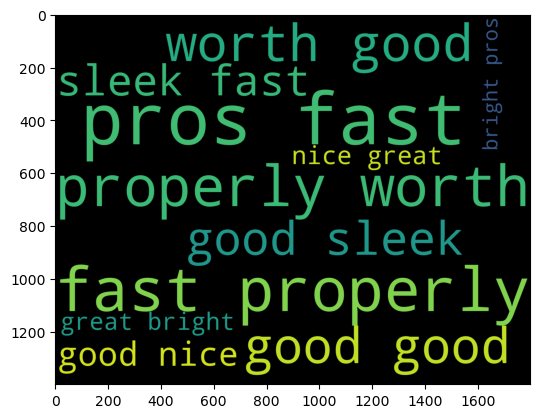

In [242]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(op_positive)

plt.imshow(wordcloud_pos)

In [243]:
with open("negative-words.txt","r") as file:
 negative= file.read().split("\n")
 negative = negative[37:]

In [244]:
negative_words_list= []

In [245]:
for word in oneplus:
    if word in negative:
        negative_words_list.append(word)

In [246]:
op_negative = " ".join(negative_words_list)

In [247]:
op_negative

' cons cons disadvantage cons disadvantage cons disadvantage laggy cons disadvantage laggy cons disadvantage laggy problem disappointed cons disadvantage laggy problem disappointed cons disadvantage laggy problem disappointed blurry slow cons disadvantage laggy problem disappointed blurry slow lost ruthless refused cons disadvantage laggy problem disappointed blurry slow lost ruthless refused cons cons disadvantage cons disadvantage cons disadvantage laggy cons disadvantage laggy cons disadvantage laggy problem disappointed cons disadvantage laggy problem disappointed cons disadvantage laggy problem disappointed blurry slow cons disadvantage laggy problem disappointed blurry slow lost ruthless refused cons disadvantage laggy problem disappointed blurry slow lost ruthless refused cons cons disadvantage cons disadvantage cons disadvantage laggy cons disadvantage laggy cons disadvantage laggy problem disappointed cons disadvantage laggy problem disappointed cons disadvantage laggy problem

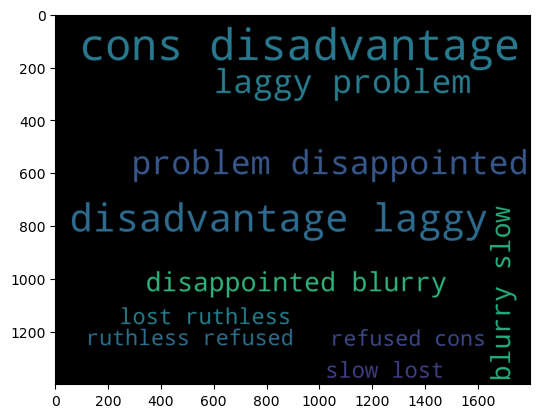

In [248]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(op_negative)

plt.imshow(wordcloud_neg)

In [253]:
op_unique = list(set(" ".join(oneplus).split(" ")))

In [254]:
op_unique

['',
 'offer',
 'camera',
 'in',
 's',
 'refused',
 'cons',
 'it',
 'using',
 'the',
 'listed',
 'used',
 'breaked',
 'easily',
 'processor',
 'wet',
 'disadvantage',
 'what',
 'vary',
 'two',
 'from',
 'brightness',
 'his',
 'few',
 'quality',
 'good',
 'for',
 'need',
 'ruthless',
 'properly',
 'of',
 'pros',
 'looking',
 'hand',
 'last',
 'possible',
 'like',
 'then',
 'not',
 'back',
 'has',
 'ok',
 'oneplus',
 'lost',
 'goodbye',
 'display',
 'month',
 'tasks',
 're',
 'light',
 'daylight',
 'pictures',
 'paying',
 'mobile',
 'second',
 'heavy',
 'this',
 'after',
 'was',
 'laggy',
 'gf',
 'may',
 'list',
 'even',
 'phone',
 't',
 'working',
 'continue',
 'amazon',
 'disappointed',
 'just',
 'surrounding',
 'great',
 'are',
 'your',
 'nice',
 'say',
 'slow',
 'brand',
 'my',
 'blurry',
 'you',
 'worth',
 'smartphone',
 'low',
 'purchasing',
 'sometimes',
 'am',
 'exposure',
 'biggest',
 'device',
 'money',
 'major',
 'sleek',
 'go',
 'hence',
 'full',
 'hours',
 'its',
 'operated'

# sentiment analysis

In [260]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [261]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [262]:
one_plus9rt

["\nPros:- fast charging.Cons:- low battery life, heavy heating , using mobile it's was strucking, display not working properly, this is not worth money\n",
 "\nPros:- fast charging.Cons:- low battery life, heavy heating , using mobile it's was strucking, display not working properly, this is not worth money\n",
 "\nThe Biggest Disadvantage is you can't exchange while purchasing a new one. Amazon itself not listed in his exchange list. What can you say.\n",
 "\nPros:- fast charging.Cons:- low battery life, heavy heating , using mobile it's was strucking, display not working properly, this is not worth money\n",
 "\nThe Biggest Disadvantage is you can't exchange while purchasing a new one. Amazon itself not listed in his exchange list. What can you say.\n",
 '\nAfter using this phone from last 8 month. Phone quality is not good. Back cover easily breaked.  Battery life is not good. Need to charge two times in 12 hours.\n',
 "\nPros:- fast charging.Cons:- low battery life, heavy heating 

In [264]:
from nltk import tokenize
rev_unique = tokenize.sent_tokenize(" ".join(one_plus9rt))
rev_unique[5:15]

['What can you say.',
 'After using this phone from last 8 month.',
 'Phone quality is not good.',
 'Back cover easily breaked.',
 'Battery life is not good.',
 'Need to charge two times in 12 hours.',
 "Pros:- fast charging.Cons:- low battery life, heavy heating , using mobile it's was strucking, display not working properly, this is not worth money\n \nThe Biggest Disadvantage is you can't exchange while purchasing a new one.",
 'Amazon itself not listed in his exchange list.',
 'What can you say.',
 'After using this phone from last 8 month.']

In [265]:
df = pd.DataFrame(rev_unique,columns=["review"])

In [258]:
df

,review
0,\nPros:- fast charging.Cons:- low battery life...
1,\nPros:- fast charging.Cons:- low battery life...
2,\nThe Biggest Disadvantage is you can't exchan...
3,\nPros:- fast charging.Cons:- low battery life...
4,\nThe Biggest Disadvantage is you can't exchan...
...,...
1040,\n1.The Device has major heating problem.I am ...
1041,\nVary nice phone\n
1042,\nThe phone is not very great for the price we...
1043,\nIt's lost with just a few second exposure to...


In [267]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [274]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 3.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2023-01-22 20:12:10.610053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-01-22 20:12:10.610102: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-22 20:12:14.047532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-01-22 20:12:14.047564: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-22 20:12:14.053802: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Jarvis
2023-01-22 20:12:14.053921: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Jarvis


In [275]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

building a custom function to calculate the sentiment of whole sentance

In [287]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        words = [token.text for token in nlp(text)]
        for word in words:
            sent_score += sentiment_lexicon.get(word, 0)
    return sent_score

In [288]:
calculate_sentiment(text = 'happy')

3

In [290]:
df['sentiment_value'] = df['review'].apply(calculate_sentiment)

In [291]:
df

,review,sentiment_value
0,\nPros:- fast charging.Cons:- low battery life...,4
1,Amazon itself not listed in his exchange list.,0
2,What can you say.,0
3,"Pros:- fast charging.Cons:- low battery life, ...",2
4,Amazon itself not listed in his exchange list.,0
...,...,...
1991,Even with full brightness its sometimes not po...,1
1992,Camera is ok ok. Pictures are very bright and ...,1
1993,the phone slow even with the latest processor.,0
1994,It's lost with just a few second exposure to w...,-3


In [292]:
df['sentiment_value'].describe()

count    1996.000000
mean        0.609218
std         1.882673
min        -3.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         6.000000
Name: sentiment_value, dtype: float64

visualization of sentiment value

In [294]:
df['index']=range(0,len(df))

C:\Users\rajiv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

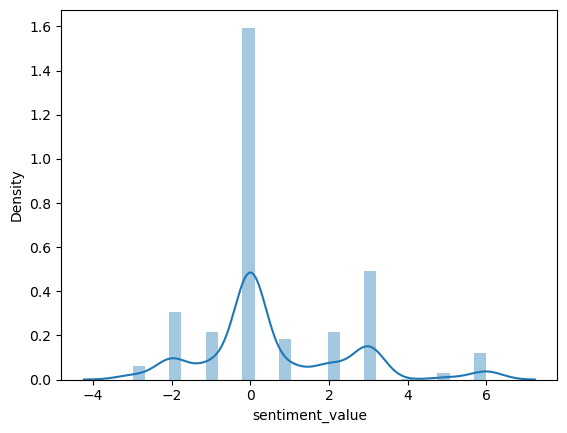

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['sentiment_value'])